# Multiple Regression Analysis

# 1. Data import

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Load the diabetes dataset (Note: standardized)
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'] + ['target'])
print("Note: bmi = body mass index, bp = average_blood_pressure, s1 = total serum cholesterol, s2 = low-density lipoproteins, s3 = high-density lipoproteins, s4 = total cholesterol, s5 = log of serum triglycerides level, s6 = disease_progression, target = quantitative measure of disease progression one year after baseline")
df.head()

Note: bmi = body mass index, bp = average_blood_pressure, s1 = total serum cholesterol, s2 = low-density lipoproteins, s3 = high-density lipoproteins, s4 = total cholesterol, s5 = log of serum triglycerides level, s6 = disease_progression, target = quantitative measure of disease progression one year after baseline


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


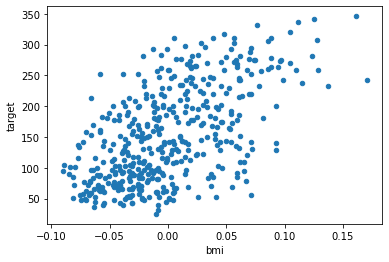

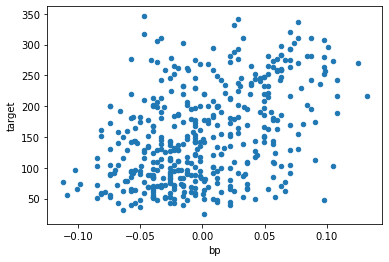

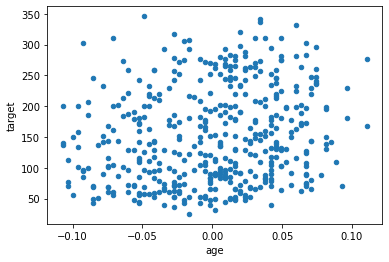

In [10]:
# scatter plot
ax1=df.plot.scatter('bmi', 'target')
ax2=df.plot.scatter('bp', 'target')
ax3=df.plot.scatter('age', 'target')

# 2. Multiple Regression Analysis

## 2.1 Fitting Regression Line

In [11]:
import statsmodels.formula.api as sm
result = sm.ols(formula='target~age+bmi+bp', data=df).fit() # add -1 to remove the constant term
print(result.summary())
print('MSE = %f' %(result.mse_model))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     95.81
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.09e-47
Time:                        17:08:10   Log-Likelihood:                -2435.7
No. Observations:                 442   AIC:                             4879.
Df Residuals:                     438   BIC:                             4896.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.859     53.211      0.0

## 2.2. Revising Regression Model

In [12]:
result = sm.ols(formula='target~bmi+bp', data=df).fit() 
print(result.summary())
print('MSE = %f' %(result.mse_model))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     143.9
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           8.68e-49
Time:                        17:08:49   Log-Likelihood:                -2435.7
No. Observations:                 442   AIC:                             4877.
Df Residuals:                     439   BIC:                             4890.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.856     53.261      0.0